## Random Forest

For this question also, you have to use the same football dataset. The aim is to use the Random Forest model to do classification and regression both.

1. Classification: Your target column is ‘contribution type’. Process the data as you want, modify/drop any columns that you want, and play around with the hyperparameters.

Try to understand and observe the difference in results. Try different losses (or quality criterion) – ‘gini’, ‘entropy’, ‘log loss’. After training the model, report test accuracy and f1 score.

2. Regression: Your target column is ‘overall’. Again, you are free to process the dataset and encouraged to try different hyperparameters. Use MSE and MAE one by one to train the models, and report test MSE and MAE for both models.

Note: You can use sklearn library to get Random Forest implementations.

In [1]:
import pandas as pd
import numpy as np
import datapurifier as dp
from datapurifier import Mleda, MlReport

In [2]:
df = pd.read_csv("football.csv")

In [3]:
report = MlReport(df)
report


Sample of Dataframe:


,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
3422,206485,R. Camacho,69,69,1100000.0,4000.0,30,185,79,111139.0,Club de Foot Montréal,USA Major League Soccer,1.0,4.0,NaN,Right,2,2,1,Medium/High,Normal (185+),1600000.0,NaN,"Solid Player, Leadership, Long Passer (AI)",38.0,42.0,62.0,57.0,67.0,78.0,49,34,68,71,40,57,58,30,70,65,39,38,32,64,51,60,65,74,80,36,79,69,48,60,64,60,68,66,65,8,6,6,15,14,NaN,0
2633,228980,M. Tirpan,71,72,2000000.0,8000.0,27,177,74,634.0,Fortuna Sittard,Holland Eredivisie,1.0,25.0,NaN,Right,3,2,1,Medium/Medium,Normal (170-185),3100000.0,NaN,"Early Crosser, Long Shot Taker (AI)",72.0,54.0,65.0,65.0,71.0,67.0,66,50,70,66,50,63,65,46,65,64,73,71,75,63,72,60,72,72,60,56,76,74,66,66,44,65,70,70,71,7,9,10,7,7,NaN,0
6487,202492,J. Lindner,63,63,400000.0,850.0,30,193,86,113743.0,Varbergs BoIS FC,Swedish Allsvenskan,1.0,18.0,NaN,Right,3,2,1,Medium/Medium,Lean (185+),500000.0,NaN,Leadership,62.0,42.0,57.0,54.0,63.0,69.0,51,35,61,62,39,52,54,54,55,62,60,63,41,59,37,59,49,71,76,39,55,64,52,57,40,57,65,62,59,10,12,7,6,7,NaN,0
2986,214918,M. Mier,70,70,1500000.0,8000.0,30,181,76,112965.0,Club Atlético Central Córdoba,Argentina Primera División,1.0,24.0,NaN,Left,3,3,1,High/Medium,Stocky (170-185),2200000.0,NaN,"Long Passer (AI), Long Shot Taker (AI)",55.0,72.0,69.0,71.0,47.0,73.0,72,71,55,69,58,72,60,75,65,72,58,53,71,67,54,79,49,72,77,75,68,57,73,69,59,69,49,40,36,6,10,7,14,7,NaN,1
1877,236190,Roberto Soira,73,73,2900000.0,12000.0,25,187,83,112476.0,Associação Chapecoense de Futebol,Campeonato Brasileiro Série A,1.0,5.0,NaN,Right,2,2,1,Medium/Medium,Normal (185+),5500000.0,NaN,NaN,55.0,45.0,52.0,63.0,74.0,71.0,40,22,72,65,58,64,41,49,42,68,58,52,52,73,42,70,38,53,79,67,81,68,25,53,67,66,72,80,78,8,15,8,6,11,NaN,0
3827,182047,Wu Yan,68,68,600000.0,5000.0,32,191,82,111779.0,Henan Songshan Longmen FC,Chinese Super League,1.0,17.0,NaN,Right,2,1,1,Medium/Medium,Normal (185+),930000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,14,22,42,20,18,14,18,44,22,54,43,61,63,63,46,63,37,57,15,37,24,18,56,15,62,18,23,18,71,64,61,66,69,50.0,0
6368,256065,M. Karamoko,64,73,1300000.0,5000.0,21,188,88,252.0,LASK Linz,Austrian Football Bundesliga,1.0,9.0,NaN,Right,3,2,1,Medium/Medium,Normal (185+),2200000.0,NaN,NaN,81.0,64.0,49.0,60.0,28.0,71.0,40,65,64,57,61,58,47,41,39,60,81,81,69,58,51,66,71,69,80,60,50,21,61,56,60,62,23,27,21,13,14,6,13,12,NaN,1
4327,256902,V. Lobry,68,71,1600000.0,3000.0,26,181,74,110321.0,Pau FC,French Ligue 2,2.0,19.0,NaN,Left,3,2,1,Medium/Medium,Normal (170-185),2900000.0,NaN,"Finesse Shot, Long Passer (AI)",73.0,65.0,69.0,68.0,52.0,65.0,68,64,57,68,59,69,71,67,69,71,76,71,62,58,68,67,68,80,60,67,60,52,64,70,62,61,48,55,51,10,12,12,8,14,NaN,1
5064,214701,T. Asta-Buruaga,66,75,1800000.0,3000.0,24,187,71,110975.0,Universidad Católica,Chilian Campeonato Nacional,1.0,7.0,NaN,Right,2,2,1,Medium/Medium,Lean (185+),2900000.0,NaN,NaN,63.0,42.0,48.0,52.0,68.0,70.0,56,37,63,56,37,45,35,41,43,56,58,67,67,60,43,51,75,71,72,45,63,62,42,37,46,52,71

Shape of DataFrame:  (7772, 66)

Categorical columns: ['short_name', 'club_name', 'league_name', 'preferred_foot', 'work_rate', 'body_type', 'player_tags', 'player_traits']

Numerical columns: ['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id', 'league_level', 'club_jersey_number', 'nation_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_

,column,unique_count,unique_percent
0,sofifa_id,7772,100.000000
1,short_name,7524,96.809058
2,overall,46,0.591868
3,potential,42,0.540401
4,value_eur,244,3.139475
...,...,...,...
61,goalkeeping_kicking,71,0.913536
62,goalkeeping_positioning,67,0.862069
63,goalkeeping_reflexes,59,0.759135
64,goalkeeping_speed,51,0.656202


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
count,7772.000000,7772.000000,7772.000000,7.706000e+03,7711.000000,7772.000000,7772.000000,7772.000000,7711.000000,7711.000000,7711.000000,533.000000,7772.000000,7772.000000,7772.000000,7.306000e+03,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,709.000000,7772.000000
mean,223576.030108,68.864642,72.068708,4.356581e+06,12104.526002,26.784483,181.484174,75.547735,51470.375178,1.360913,16.528466,12.067542,2.998713,2.457669,1.147967,8.235466e+06,68.607107,54.401954,60.148096,64.637689,55.528529,68.312473,52.968863,48.333248,55.050566,62.389475,44.871462,58.453680,50.493181,45.413278,56.859238,61.838008,65.953680,66.069609,65.342126,65.050051,64.889089,60.591611,67.217190,67.906330,68.199434,49.949949,59.799151,51.452265,53.215260,57.015440,49.969506,61.966804,51.276248,52.237133,49.731987,15.892306,15.652728,15.534869,15.800051,15.994339,40.332863,0.456253
std,26710.971306,5.951090,6.075526,1.047773e+07,24717.270914,4.318905,6.861546,7.046195,54493.246508,0.760792,15.471724,6.937905,0.685530,0.784704,0.471261,2.050041e+07,11.701207,14.351594,9.579853,9.363637,15.643798,8.515295,17.849182,19.583571,16.894676,13.281671,17.892006,17.912354,18.395100,17.871294,14.142718,15.414060,14.505087,14.401192,14.484987,7.938847,14.222438,13.066384,12.170355,15.077861,11.788985,19.311624,16.262309,20.107885,19.310655,13.574779,15.680751,10.884304,19.652449,20.913706,20.637531,17.452831,16.749303,16.299055,17.172838,17.858210,10.211288,0.498115
min,41.000000,48.000000,53.000000,2.500000e+04,500.000000,17.000000,156.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,207560.750000,65.000000,68.000000,7.250000e+05,2000.000000,24.000000,177.000000,70.000000,503.000000,1.000000,6.000000,6.000000,3.000000,2.000000,1.000000,1.200000e+06,62.000000,44.000000,54.000000,59.000000,42.500000,63.000000,43.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.750000,32.000000,50.000000,58.000000,58.000000,59.000000,58.000000,60.000000,57.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,43.000000,48.000000,40.000000,56.000000,35.000000,34.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,0.000000
50%,2


Null Information of Dataframe: 


There are total 18 columns having null values out of 66 columns in dataframe



,column_name,null_rows,null_percentage
0,nation_jersey_number,7239,93.142048
1,goalkeeping_speed,7063,90.877509
2,player_tags,6900,88.780237
3,player_traits,2901,37.326300
4,pace,709,9.122491
5,shooting,709,9.122491
6,passing,709,9.122491
7,dribbling,709,9.122491
8,defending,709,9.122491
9,physic,709,9.122491


## Data Preprocessing

In [4]:
### Removing categorical columns, more null values columns, unrelated columns (ID, ...)

required_columns = ["overall", 'potential', 'value_eur',
        'age', 'height_cm', 'weight_kg',
       'release_clause_eur', 'pace', 'shooting', 'passing',
        'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type']

df1 = df[required_columns].copy()

## Correlation (with removing highly correlated features in RF the accuracy decreases)

# cor_matrix = df1.corr().abs() 
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) 
# corr_threshold = 0.95
# columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)] 
# df2 = df1.drop(columns_to_drop, axis=1) 
# print("\nTotal Columns After dropping highly correlated columns: ", len(df2.columns))
# print("\n")
# print(df2.columns)

## dropping rows

# data = df1.dropna()
data = df1.fillna(df1.median())
print("Dataframe Shape: ", data.shape)

Dataframe Shape:  (7772, 48)


## Random Forest Classification

### Splitting the dataset and Training the model

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['contribution_type'])
y = data['contribution_type']

# 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6217, 47)
Shape of y_train: (6217,)
Shape of X_test: (1555, 47)
Shape of y_test: (1555,)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

criterion_list = ["gini", "entropy"] 
results = []
n_estimators_list = [25, 50, 100, 150, 200, 300, 500]
overall_results = []

for n_estimator in n_estimators_list:
    for criterion in criterion_list:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimator, criterion=criterion, random_state=42)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({'Criterion': criterion, 'Accuracy': accuracy, 'F1 Score': f1})
    overall_results.append({'N_estimator': n_estimator, 'Accuracy': accuracy})
    print("For ", n_estimator, " trees in the forest.\n")
    results_df = pd.DataFrame(results)
    print(results_df)
    results.clear()
    print("\n\n")


For  25  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.891961  0.891633
1   entropy  0.892605  0.892377



For  50  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.894534  0.894054
1   entropy  0.890032  0.889628



For  100  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.896463  0.896063
1   entropy  0.890032  0.889689



For  150  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.897106  0.896757
1   entropy  0.891961  0.891633



For  200  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.894534  0.894232
1   entropy  0.891961  0.891671



For  300  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.894534  0.894267
1   entropy  0.896463  0.896158



For  500  trees in the forest.

  Criterion  Accuracy  F1 Score
0      gini  0.893891  0.893596
1   entropy  0.893891  0.893631





In [7]:
overall_results_df = pd.DataFrame(overall_results)
print(overall_results_df)

   N_estimator  Accuracy
0           25  0.892605
1           50  0.890032
2          100  0.890032
3          150  0.891961
4          200  0.891961
5          300  0.896463
6          500  0.893891


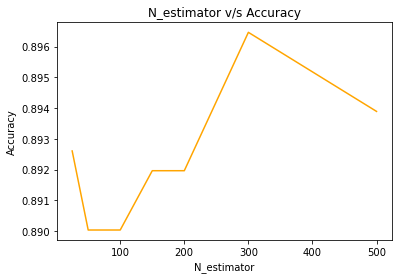

In [8]:
import matplotlib.pyplot as plt 
plt.plot(overall_results_df["N_estimator"], overall_results_df["Accuracy"], color='orange') 
plt.xlabel("N_estimator") 
plt.ylabel("Accuracy")   
plt.title("N_estimator v/s Accuracy") 
plt.show() 

In [9]:
## Hyperparameter Tunning
parameter={
    'n_estimators' : [300],
    'criterion':["gini", "entropy", "log_loss"], 
    'max_depth':[12,14,16,20],
    'max_features':['auto', 'sqrt', 'log2']
}
classifier = RandomForestClassifier()

### Training (20 mins)

In [10]:
from sklearn.model_selection import GridSearchCV

classifiercv = GridSearchCV(classifier,param_grid=parameter,cv=5, scoring='accuracy')
classifiercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [12, 14, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]},
             scoring='accuracy')

In [11]:
classifiercv.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [12]:
y_pred = classifiercv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
F1 Score: 0.90


## Random Forest Regression

### Splitting the dataset and Training the model

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['overall'])
y = data['overall']

# 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6217, 47)
Shape of y_train: (6217,)
Shape of X_test: (1555, 47)
Shape of y_test: (1555,)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Hyperparameter Tunning
parameter={
    'n_estimators' : [300],
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':[12, 14, 16, 20],
    'max_features':['auto', 'sqrt', 'log2']
}
regressor = RandomForestRegressor()

In [15]:
from sklearn.model_selection import GridSearchCV

regressorcv = GridSearchCV(regressor,param_grid=parameter,cv=5, scoring='neg_mean_squared_error')
regressorcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [12, 14, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300]},
             scoring='neg_mean_squared_error')

In [16]:
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 300}

In [17]:
y_pred = regressorcv.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.34
Mean Squared Error (MSE): 0.32
R2 Score: 0.99
